In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

In [ ]:
simulador = AerSimulator()

# A Porta Pauli-X (Bit-Flip)

A porta **X** é o equivalente quântico da porta NOT clássica. Ela rotaciona o estado do qubit em $180^\circ$ ($\pi$ radianos) ao redor do eixo X da Esfera de Bloch.

Sua representação matricial é:
$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

Aplicando ao estado fundamental $|0\rangle$:
$$X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

O vetor de estado resultante deve ter amplitude 0 para o estado $|0\rangle$ e amplitude 1 para o estado $|1\rangle$. Na Esfera de Bloch, o vetor apontará para o **Polo Sul**.

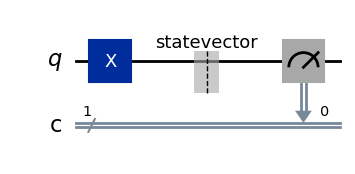

In [ ]:
qc_x = QuantumCircuit(1, 1)

qc_x.x(0)
qc_x.save_statevector()

qc_x.measure(0, 0)

display(qc_x.draw("mpl"))

In [ ]:
job_x = simulador.run(qc_x)
result_x = job_x.result()

state_x = result_x.data()['statevector']

print("Estado 0")
print(state_x[0])

print("Estado 1")
print(state_x[1])

Estado 0
0j
Estado 1
(1+0j)


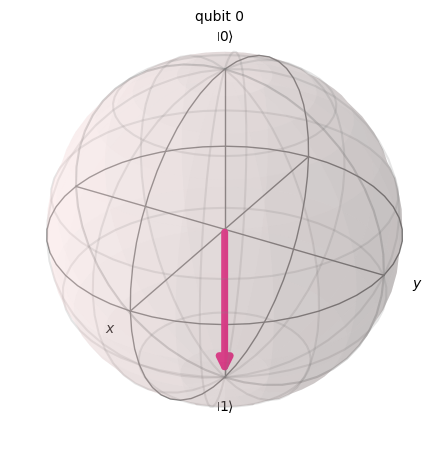

In [ ]:
display(plot_bloch_multivector(state_x))

# O Estado "Minus" ($|-\rangle$): Diferença de Fase

Vimos anteriormente que $H|0\rangle = |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$.
Mas o que acontece se aplicarmos a porta Hadamard ao estado $|1\rangle$?

Primeiro aplicamos X para obter $|1\rangle$, e depois H:

$$H|1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

O resultado é o estado:
$$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

**Interpretação Física:**
1.  **Probabilidades:** Note que $|\frac{1}{\sqrt{2}}|^2 = 0.5$ e $|-\frac{1}{\sqrt{2}}|^2 = 0.5$. As chances de medir 0 ou 1 continuam sendo 50/50.
2.  **Fase (O Sinal de Menos):** A diferença crucial está na **Fase Relativa**. O sinal negativo faz com que o vetor na Esfera de Bloch aponte para a direção **negativa do eixo X** (costas da esfera), oposto ao estado $|+\rangle$.

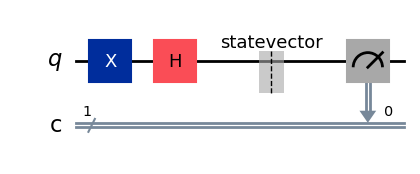

In [ ]:
qc_x_hadamard = QuantumCircuit(1, 1)

qc_x_hadamard.x(0)
qc_x_hadamard.h(0)

qc_x_hadamard.save_statevector()

qc_x_hadamard.measure(0, 0)
display(qc_x_hadamard.draw("mpl"))

In [ ]:
job_x_hadamard = simulador.run(qc_x_hadamard)
result_x_hadamard = job_x_hadamard.result()

state_x_hadamard = result_x_hadamard.data()['statevector']

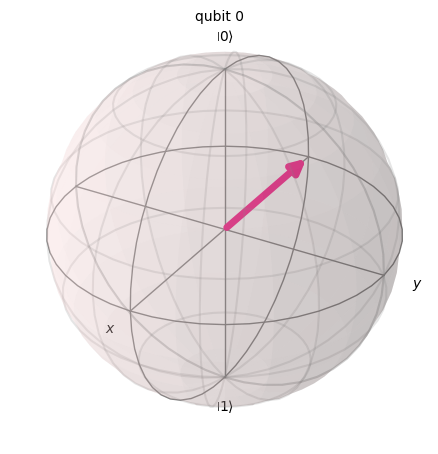

In [ ]:
display(plot_bloch_multivector(state_x_hadamard))